In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('Year2010-2011.csv', parse_dates=['InvoiceDate'], encoding='unicode_escape')

In [30]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Для удобства поменяем название столбца "Customer ID".

In [31]:
df = df.rename(columns={'Customer ID': 'CustomerID'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   CustomerID   406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
CustomerID     135080
Country             0
dtype: int64

In [7]:
non_discr = df.query('Description.isna()')
non_discr.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [8]:
non_discr.isnull().sum()

Invoice           0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
Price             0
CustomerID     1454
Country           0
dtype: int64

In [9]:
non_discr.Price.value_counts()

Price
0.0    1454
Name: count, dtype: int64

In [34]:
non_cust = df.query('CustomerID.isna()')
non_cust.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country


Уберем пропуски и дубликаты, если такие имеются.

In [33]:
df.dropna(inplace=True)

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.describe()

,Quantity,InvoiceDate,Price,CustomerID
count,401605.000000,401605,401605.000000,401605.000000
mean,12.183245,2011-07-10 12:08:56.555570944,3.474100,15281.154341
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 12:00:00,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.282726,NaN,69.763952,1714.008869


В датасете присутствуют транзакции с отрицательным количеством, чего быть не может. Можно предположить, что это отмененные заказы. Уберем данные заказы. Также уберем заказы, где цена товаара равна 0.

In [15]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

Далее выделим когорты. Когортами будут выступать месяц первой транзакции для каждого покупателя. Также выделим месяц покупки.

In [16]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')

In [17]:
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [18]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,order_month,cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12


Посчитаем количество уникальных клиентов для каждой когорты каждый месяц и пронумеруем месяцы.

In [19]:
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)

In [20]:
def cohort_month(df):
    df['month'] = np.arange(len(df))
    return df

df_cohort = df_cohort.groupby('cohort', as_index=False).apply(cohort_month)

In [21]:
df_cohort.head()

cohort order_month  n_customers  month
0 0  2010-12     2010-12          885      0
  1  2010-12     2011-01          324      1
  2  2010-12     2011-02          286      2
  3  2010-12     2011-03          340      3
  4  2010-12     2011-04          321      4

Создадим сводную таблицу.

In [22]:
pivot = df_cohort.pivot_table(index='cohort', columns='month', values='n_customers')

In [23]:
pivot

month,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сделаем таблицу более информативной предоставив информацию о том, сколько процентов покупателей в когорте вернулось в определенный месяц.

In [24]:
cohort_size = pivot.iloc[:, 0]

In [25]:
retention = pivot.divide(cohort_size, axis=0)

In [26]:
retention

month,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Далее создадим тепловую карту.

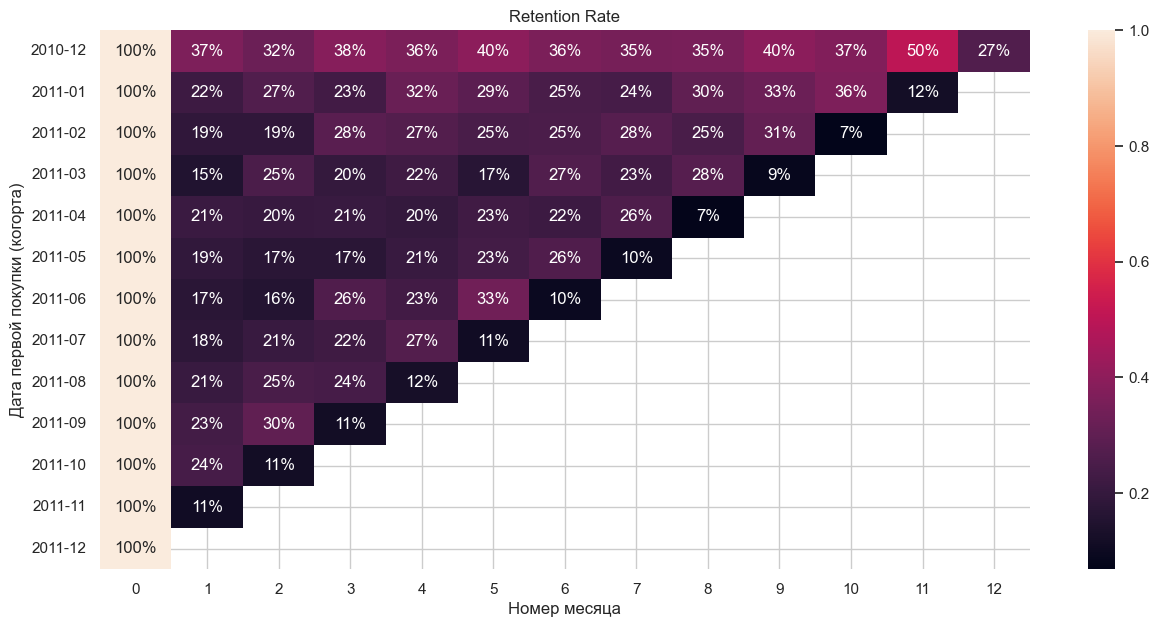

In [27]:
sns.set(
    style="whitegrid",
    rc={'figure.figsize':(15,7)}
        )

sns.heatmap(retention, mask=retention.isnull(), annot=True, fmt='.0%')
plt.title('Retention Rate')
plt.ylabel('Дата первой покупки (когорта)')
plt.xlabel('Номер месяца')
plt.show()